# Visualizing Training Metrics for Four Models
This notebook visualizes the training loss, training accuracy, and test accuracy for four models using Seaborn. Each metric is plotted as a separate graph with overlayed lines for the models.

In [13]:
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [22]:
df = pd.read_csv('grid_search_2.csv')

# Convert to DataFrame
df

,learning_rate,batch_size,dropout_rate,train_losses,train_accuracies,test_accuracies,final_acc,tpr,fpr,recall
0,0.0001,16,0.1,"[0.41000926397680265, 0.287202753914081, 0.206...","[0.8154471544715447, 0.8788617886178862, 0.915...","[0.8668831168831169, 0.8863636363636364, 0.918...",0.974026,[0.98684211],[0.0625],[0.98684211]
1,0.0001,16,0.2,"[0.4217098494855369, 0.2958694007338547, 0.213...","[0.802439024390244, 0.8682926829268293, 0.9195...","[0.8344155844155844, 0.8766233766233766, 0.918...",0.964286,[0.98684211],[0.1],[0.98684211]
2,0.0001,16,0.3,"[0.417391154339643, 0.27635730572832307, 0.205...","[0.7943089430894309, 0.8821138211382114, 0.921...","[0.8668831168831169, 0.8961038961038961, 0.928...",0.970779,[1.],[0.1125],[1.]
3,0.0001,16,0.4,"[0.4587392397043182, 0.3113618874937538, 0.247...","[0.7894308943089431, 0.8617886178861789, 0.910...","[0.8409090909090909, 0.8376623376623377, 0.892...",0.964286,[0.99561404],[0.125],[0.99561404]
4,0.0001,32,0.1,"[0.4534130687393793, 0.3274711866204332, 0.237...","[0.7886178861788617, 0.8569105691056911, 0.909...","[0.7987012987012987, 0.8701298701298701, 0.899...",0.967532,[0.99122807],[0.1],[0.99122807]
...,...,...,...,...,...,...,...,...,...,...
59,0.0050,64,0.4,"[1.1070554612128716, 0.4195031501413361, 0.370...","[0.7048780487804878, 0.7764227642276422, 0.817...","[0.6883116883116883, 0.7987012987012987, 0.827...",0.938312,[0.95614035],[0.1125],[0.95614035]
60,0.0050,128,0.1,"[1.356908753877733, 0.42931915657307074, 0.396...","[0.7032520325203252, 0.7642276422764228, 0.777...","[0.7402597402597403, 0.7532467532467533, 0.766...",0.941558,[0.98684211],[0.1875],[0.98684211]
61,0.0050,128,0.2,"[1.1926740753456828, 0.5187742103890675, 0.376...","[0.7178861788617886, 0.7878048780487805, 0.833...","[0.7402597402597403, 0.7824675324675324, 0.818...",0.935065,[0.98684211],[0.2125],[0.98684211]
62,0.0050,128,0.3,"[1.4782733199073048, 0.572229074850315, 0.4513...","[0.6455284552845528, 0.7634146341463415, 0.766...","[0.7402597402597403, 0.7305194805194806, 0.740...",0.931818,[0.96052632],[0.15],[0.96052632]


In [23]:
df['test_accuracies'] = df['test_accuracies'].apply(ast.literal_eval)
df['train_losses'] = df['train_losses'].apply(ast.literal_eval)
df['train_accuracies'] = df['train_accuracies'].apply(ast.literal_eval)



In [ ]:

records = []

for idx, row in df.iterrows():
    test_accuracies = row['test_accuracies']
    train_accuracies = row['train_accuracies']
    train_losses = row['train_losses']
    for epoch in range(len(test_accuracies)):
        records.append({
            'epoch': epoch,
            'train_loss': train_losses[epoch],
            'train_accuracy': train_accuracies[epoch],
            'test_accuracy': test_accuracies[epoch],
            'learning_rate': row['learning_rate'],
            'batch_size': row['batch_size'],
            'dropout_rate': row['dropout_rate'],
            'config_id': idx  # use row index as config identifier
        })


# Create a long-form DataFrame
long_df = pd.DataFrame(records)
long_df = long_df[long_df['config_id'] > 0]

,epoch,train_loss,train_accuracy,test_accuracy,learning_rate,batch_size,dropout_rate,config_id
0,0,0.410009,0.815447,0.866883,0.0001,16,0.1,0
1,1,0.287203,0.878862,0.886364,0.0001,16,0.1,0
2,2,0.206363,0.915447,0.918831,0.0001,16,0.1,0
3,3,0.140779,0.952846,0.944805,0.0001,16,0.1,0
4,4,0.119592,0.960976,0.944805,0.0001,16,0.1,0
...,...,...,...,...,...,...,...,...
1595,20,0.131244,0.947967,0.720779,0.0050,128,0.4,63
1596,21,0.149339,0.949593,0.896104,0.0050,128,0.4,63
1597,22,0.113364,0.963415,0.961039,0.0050,128,0.4,63
1598,23,0.084803,0.971545,0.808442,0.0050,128,0.4,63


/var/folders/mk/crjfjqz10h53h7_89msl4z8m0000gn/T/ipykernel_8664/3770937336.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


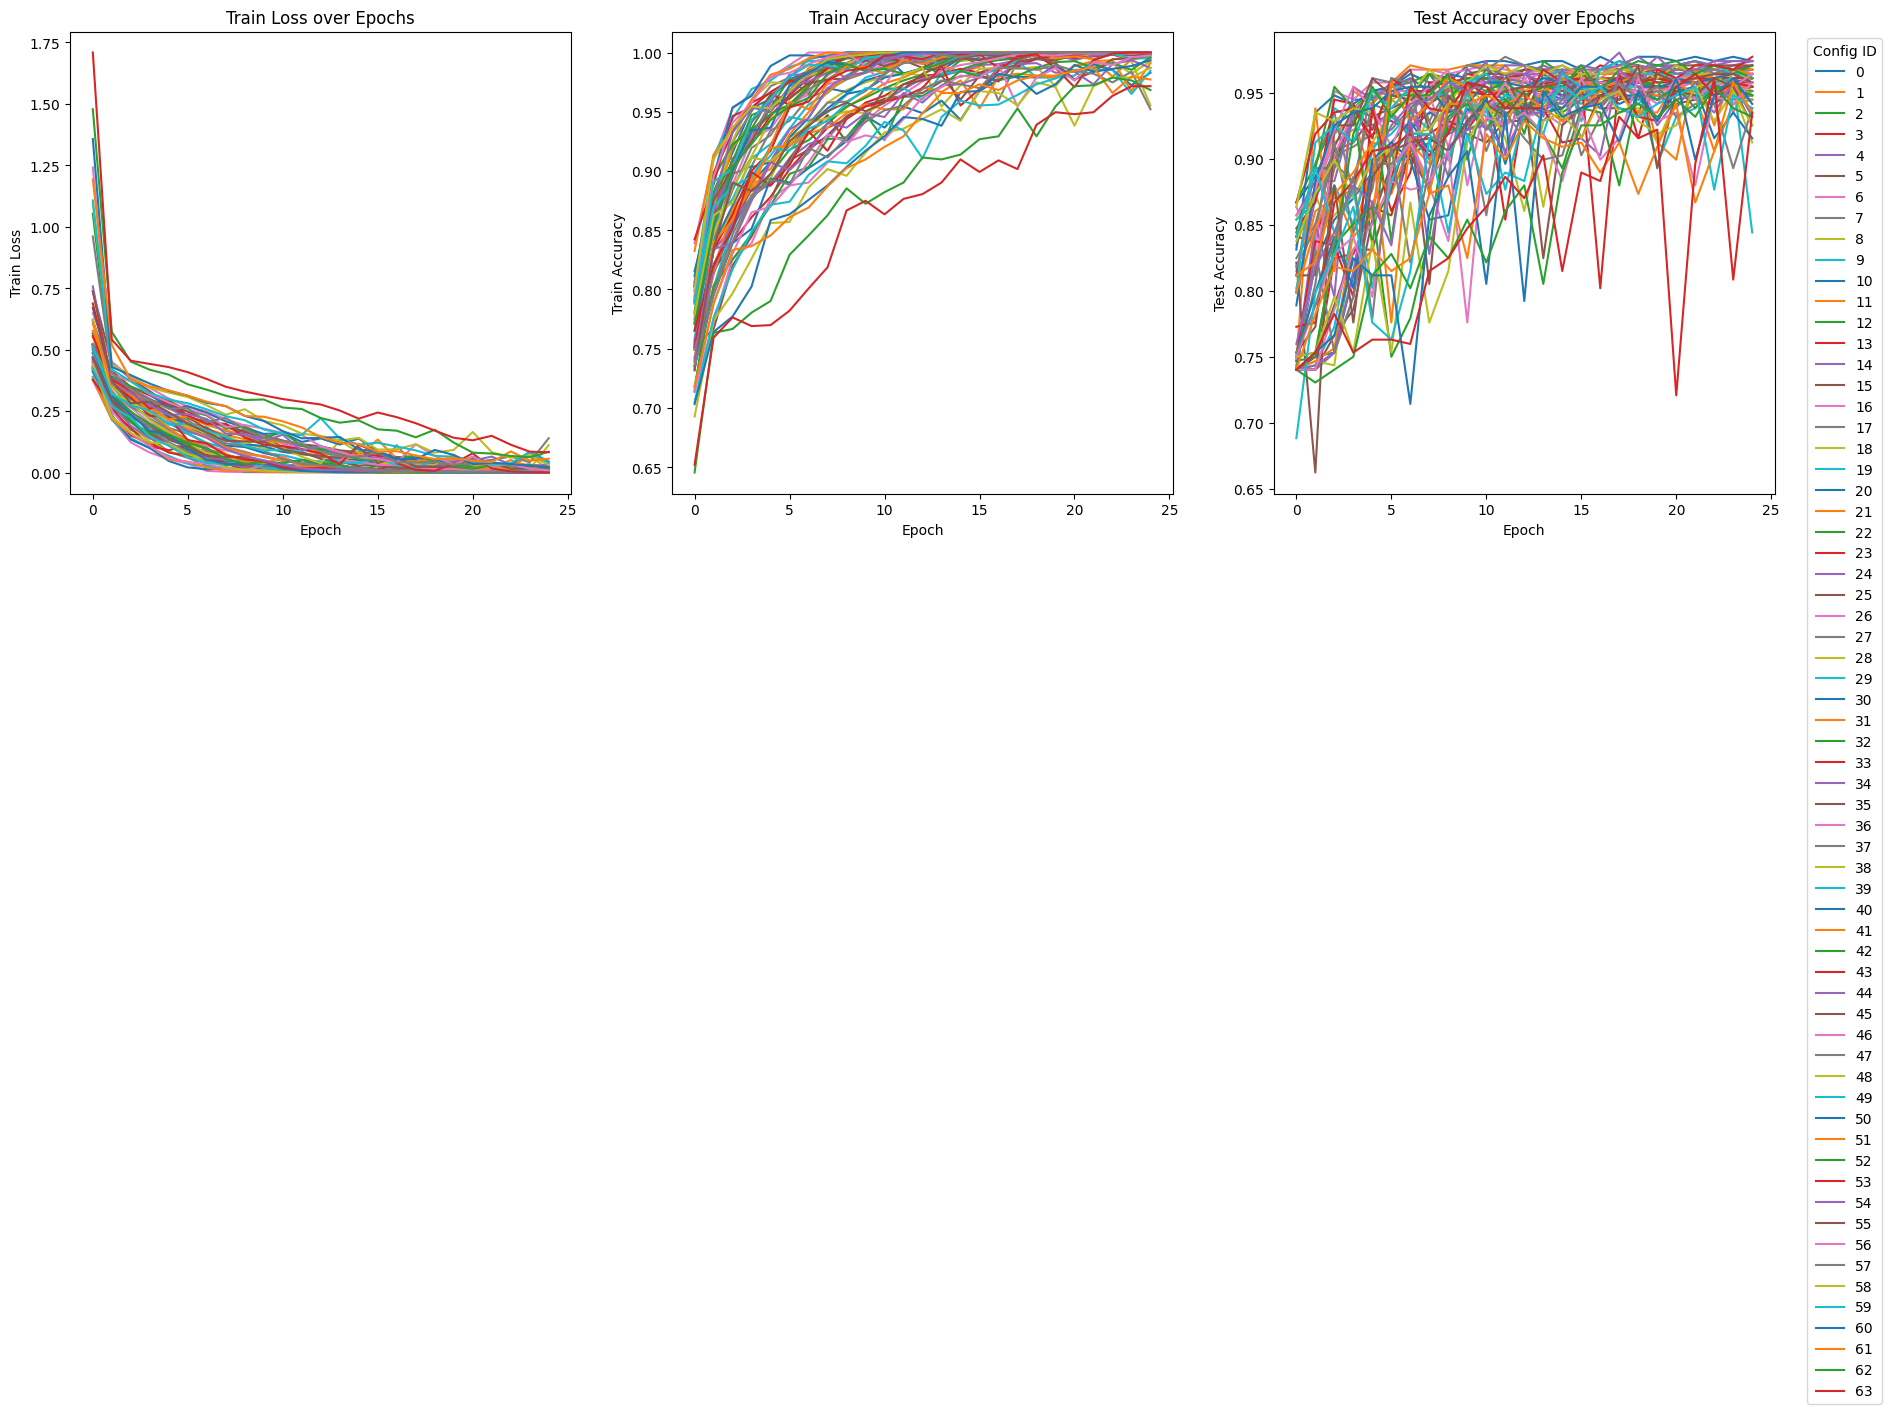

In [26]:
# Plot all three metrics side by side
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

sns.lineplot(data=long_df, x='epoch', y='train_loss', hue='config_id', palette='tab10', ax=axes[0])
axes[0].set_title('Train Loss over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Train Loss')

sns.lineplot(data=long_df, x='epoch', y='train_accuracy', hue='config_id', palette='tab10', ax=axes[1])
axes[1].set_title('Train Accuracy over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Train Accuracy')

sns.lineplot(data=long_df, x='epoch', y='test_accuracy', hue='config_id', palette='tab10', ax=axes[2])
axes[2].set_title('Test Accuracy over Epochs')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Test Accuracy')

axes[2].legend(title='Config ID', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].legend_.remove()
axes[1].legend_.remove()

plt.tight_layout()
plt.show()